In [1]:
import sklearn
import pandas as pd
import os
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
csv_path = os.path.join('town_data.csv')
town_data = pd.read_csv(csv_path)

In [3]:
town_data.head()

,town,accountants_per_10000_residents_2013,apartments_condos_multis_per_residential_parcels_2011,architects_per_10000_2013,assessed_home_value_changes_2009-2013,barbers_per_10000_residents_2013,births_per_1000_residents_2010,boaters_per_10000_residents_2012,burglaries_per_10000_residents_2011,cars_motorcycles_&_trucks_average_age_2012,...,tax_bills_for_single-family_homes_2013,taxable_property_by_percent_2012,teacher_salaries_by_average_2011,teachers_percent_under_40_years_old_2011-2012,trucks_per_1000_residents_2012,veterinarians_per_10000_2013,violent_crimes_per_10000_residents_2012,voters_as_a_percent_of_population_2012,voters_change_in_registrations_between_1982-2012,2020_label
0,Abington,29.4,0.219,3.8,-0.149,8.1,12.1,137.6,63.5,9.9,...,4756.0,92.9,73887.0,0.32,354,1.3,25.3,10902,0.51,light blue
1,Acton,36.0,0.329,10.5,-0.004,1.8,8.2,69.8,10.4,8.5,...,9650.0,93.7,75741.0,0.31,280,6.4,10.3,14398,0.34,wicked blue
2,Acushnet,7.8,0.050,0.0,-0.188,7.8,8.0,287.3,41.7,10.9,...,3380.0,95.1,57227.0,0.43,379,1.9,12.5,7478,0.44,red
3,Adams,5.9,0.209,1.2,-0.051,11.8,10.3,212.1,77.1,10.0,...,2453.0,88.0,NaN,NaN,366,0.0,48.2,5980,-0.03,medium blue
4,Agawam,15.1,0.214,1.4,-0.107,8.1,9.6,246.1,19.3,9.7,...,3245.0,88.1,60647.0,0.36,328,2.1,11.8,21365,0.63,red


In [4]:
town_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 75 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   town                                                              350 non-null    object 
 1   accountants_per_10000_residents_2013                              350 non-null    float64
 2   apartments_condos_multis_per_residential_parcels_2011             349 non-null    float64
 3   architects_per_10000_2013                                         350 non-null    float64
 4   assessed_home_value_changes_2009-2013                             335 non-null    float64
 5   barbers_per_10000_residents_2013                                  350 non-null    float64
 6   births_per_1000_residents_2010                                    350 non-null    float64
 7   boaters_per_10000_residents_2012   

In [5]:
town_labels = town_data["2020_label"]
town_features = town_data.drop("2020_label", axis=1)

##### Data Preparation and Cleaning

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(town_features, town_labels, test_size=0.2, random_state=42)



# Town names are not useful for training, but will be needed later
X_train_towns = X_train["town"]
X_train = X_train.drop("town", axis=1)

X_test_towns = X_test["town"]
X_test = X_test.drop("town", axis=1)
all_feature_names = list(X_train.columns)


# Replace missing values with median and standardize
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cat', OrdinalEncoder())
])

y_train = y_train.values.reshape(-1,1) # Reformat y for pipeline
y_test = y_test.values.reshape(-1,1)

X_train_tr = num_pipeline.fit_transform(X_train) # tranformed town data

X_test_tr = num_pipeline.fit_transform(X_test)
y_train_tr = cat_pipeline.fit_transform(y_train)
y_test_tr = cat_pipeline.fit_transform(y_test)
print(X_train_tr.shape)
#X_train_DF = pd.DataFrame(data=X_train_tr, index=[X_train_towns], columns=[X_train.columns])
X_train_DF = pd.DataFrame(data=X_train_tr, index=[X_train_towns], columns=[X_train.columns])
X_train_tr = X_train_DF
X_train_tr

(280, 73)


,accountants_per_10000_residents_2013,apartments_condos_multis_per_residential_parcels_2011,architects_per_10000_2013,assessed_home_value_changes_2009-2013,barbers_per_10000_residents_2013,births_per_1000_residents_2010,boaters_per_10000_residents_2012,burglaries_per_10000_residents_2011,cars_motorcycles_&_trucks_average_age_2012,cars_per_1000_residents_2012,...,tax_bills_for_single-family_homes_2012,tax_bills_for_single-family_homes_2013,taxable_property_by_percent_2012,teacher_salaries_by_average_2011,teachers_percent_under_40_years_old_2011-2012,trucks_per_1000_residents_2012,veterinarians_per_10000_2013,violent_crimes_per_10000_residents_2012,voters_as_a_percent_of_population_2012,voters_change_in_registrations_between_1982-2012
town,,,,,,,,,,,,,,,,,,,,,
Pelham,-0.648871,-0.720378,1.545482,0.588445,-1.081666,0.268148,-0.275699,-1.169190,-0.229642,1.894832,...,0.630222,0.587707,-1.129181,-0.792632,-3.789354,-0.599138,3.909216,-1.080284,-0.443001,0.049904
Dover,1.518483,-0.713253,1.698538,-0.354751,-0.797744,-0.660422,-0.582676,-0.956302,-0.617575,0.369596,...,3.592341,3.541434,-0.365044,3.741656,-0.876649,0.019086,-0.571147,-0.802231,-0.323103,-0.600009
Egremont,-1.092857,-0.948374,-0.765662,-1.180047,0.211759,-1.622155,-0.423300,-0.356345,1.516054,2.443315,...,-0.715610,-0.759714,-0.619757,0.009375,0.050121,0.825919,0.800830,0.199808,-0.444749,-1.017810
Attleboro,-0.438561,0.519354,-0.658523,-1.180047,-0.292992,0.997739,-0.577630,0.427469,0.061307,0.249380,...,-0.569804,-0.547263,0.089799,0.009375,0.050121,-0.662008,-0.614021,0.609018,0.554327,0.514127
Colrain,-1.092857,-0.670503,0.152673,1.192679,-0.135258,0.997739,-0.196852,-0.245063,1.128121,-0.379873,...,-0.778164,-0.786435,0.599224,0.009375,0.050121,0.888790,-0.957015,-0.261864,-0.437037,-0.832120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Danvers,0.823294,0.654727,-0.122827,-0.163164,1.126621,-0.196137,-0.121579,-0.349894,-1.102490,0.527379,...,0.139449,0.166309,-0.474207,0.481465,0.712100,-0.253352,-0.399650,0.047666,0.238360,-0.600009
Gloucester,-0.321723,0.968222,0.137368,-0.060002,-0.308766,0.102332,1.237533,-0.501496,-0.132659,-0.235239,...,0.428761,0.433954,0.508255,-0.039266,-1.406232,-0.389570,-0.292464,-0.597626,0.312327,-0.646431
Shutesbury,-0.105572,-0.848626,0.091451,0.662132,-1.081666,-0.361953,0.326903,-0.245063,0.061307,1.774616,...,0.116451,0.135646,0.362705,-1.523814,-2.333002,-0.358135,0.243465,-0.261864,-0.425943,2.487076


## Model Exploration: Decision Tree, Random Forest, KNN

In [7]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import randint

basic_tree = DecisionTreeClassifier(random_state=42)

param_dist_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [3, 5, 10, 15, 20, 50],
    'max_features': [3, 5, 10, 15, 20, 70]
}

basic_tree_clf = GridSearchCV(basic_tree, param_dist_tree, cv=5)


In [8]:
basic_tree_clf.fit(X_train_tr, y_train_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [3, 5, 10, 15, 20, 70],
                         'min_samples_leaf': [3, 5, 10, 15, 20, 50]})

In [9]:
print(basic_tree_clf.best_estimator_)
print(basic_tree_clf.best_params_)
print(basic_tree_clf.best_score_)

DecisionTreeClassifier(max_depth=5, max_features=15, min_samples_leaf=10,
                       random_state=42)
{'criterion': 'gini', 'max_depth': 5, 'max_features': 15, 'min_samples_leaf': 10}
0.5571428571428572


In [10]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)

param_grid_forest = {
    'n_estimators': [50, 75, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 25],
    'bootstrap': [True, False]
    
}

forest_clf = GridSearchCV(forest, param_grid_forest, cv=5, n_jobs=-1)

In [11]:
forest_clf.fit(X_train_tr, y_train_tr.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 25],
                         'n_estimators': [50, 75, 100, 150, 200, 250]})

In [12]:

print(forest_clf.best_estimator_)
print(forest_clf.best_params_)
print(forest_clf.best_score_)

RandomForestClassifier(max_depth=10, random_state=42)
{'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}
0.6714285714285715


In [13]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

param_grid_KNN = {
    'n_neighbors':[2, 3, 4, 5, 10]
}

KNN_clf = GridSearchCV(KNN, param_grid_KNN, cv=5) 


In [14]:
KNN_clf.fit(X_train_tr, y_train_tr.ravel())


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 10]})

In [15]:
print(KNN_clf.best_estimator_)
print(KNN_clf.best_params_)
print(KNN_clf.best_score_)

KNeighborsClassifier(n_neighbors=4)
{'n_neighbors': 4}
0.5285714285714286


In [16]:
# XGBoost
xgb_clf = XGBClassifier()

xgb_clf.fit(X_train_tr, y_train_tr.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

##### Evaluation on Test Set

In [17]:
# Tree test set evaluation
y_test_tree = basic_tree_clf.predict(X_test_tr)

tree_acc =  accuracy_score(y_test_tr, y_test_tree)
tree_f1 = f1_score(y_test_tr, y_test_tree, average='macro')

print("Tree final performance")
print(f"Accuracy: {tree_acc}")
print(f"F1 Score: {tree_f1}")

Tree final performance
Accuracy: 0.6
F1 Score: 0.6003390149731612


In [18]:
# Forest test set evaluation
y_test_forest = forest_clf.predict(X_test_tr)

forest_acc =  accuracy_score(y_test_tr, y_test_forest)
forest_f1 = f1_score(y_test_tr, y_test_forest, average='weighted')

print("Forest final performance")
print(f"Accuracy: {forest_acc}")
print(f"F1 Score: {forest_f1}")

Forest final performance
Accuracy: 0.7142857142857143
F1 Score: 0.7083482437140973


In [19]:
# KNN test set evaluation
y_test_KNN = KNN_clf.predict(X_test_tr)

KNN_acc =  accuracy_score(y_test_tr, y_test_KNN)
KNN_f1 = f1_score(y_test_tr, y_test_KNN, average='weighted')

print("K Nearest Neighbors final performance")
print(f"Accuracy: {KNN_acc}")
print(f"F1 Score: {KNN_f1}")


K Nearest Neighbors final performance
Accuracy: 0.6571428571428571
F1 Score: 0.6531885268727375


In [20]:
# XGBoost test set evaluation
y_test_xgb = xgb_clf.predict(X_test_tr)

xgb_acc =  accuracy_score(y_test_tr, y_test_xgb)
xgb_f1 = f1_score(y_test_tr, y_test_xgb, average='weighted')

print("XGBoost final performance")
print(f"Accuracy: {xgb_acc}")
print(f"F1 Score: {xgb_f1}")

XGBoost final performance
Accuracy: 0.7285714285714285
F1 Score: 0.7247911445279867


# Results

Most important Features:


,Feature,Importance Score
44,motorcycles_per_1000_2012,0.044011
33,hybrid_cars_per_1000_vehicles_2013,0.041042
45,multi-generation_households_2010,0.040829
15,dentists_per_10000_2013,0.038100
43,motorcycles_change_in_ownership_2000-2012,0.034696
35,income_average_per_resident_2010,0.028164
19,electricians_per_1000_residents_2013,0.027517
31,households_average_size_2010,0.026280
12,construction_supervisors_per_10000_2013,0.025889
18,education_spending_per_resident_2012,0.025318


Least important Features:


,Feature,Importance Score
14,culture_and_rec_spending_per_person_2012,0.002531
34,in_home_since_1969_or_earlier,0.003134
32,households_one-person_2010,0.003174
22,fire_dept_spending_as_a_percent_2012,0.003228
23,firefighter_costs_per_resident_2012,0.003889
68,trucks_per_1000_residents_2012,0.003901
17,education_spending_as_a_percent_2012,0.003925
55,residential_taxes_as_percent_of_all_property_t...,0.003929
51,property_crimes_per_10000_residents_2012,0.004405
41,miles_driven_daily_per_household_05-07,0.004535


<AxesSubplot:title={'center':'Feature Importance by Gain'}, xlabel='F score', ylabel='Features'>

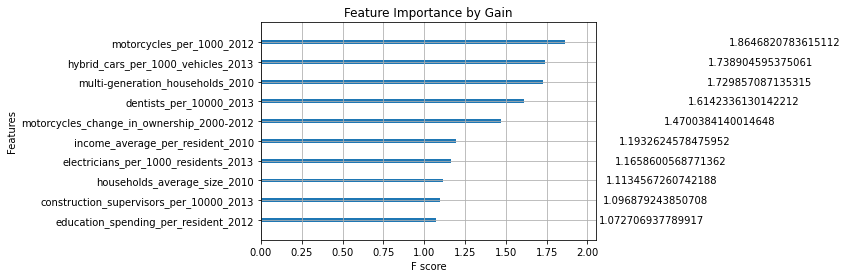

In [21]:
xgb_clf.feature_importances_
importance_data = {'Feature': X_train.columns,'Importance Score':xgb_clf.feature_importances_}
features_importances = pd.DataFrame(data= importance_data)
print("Most important Features:")
display(features_importances.sort_values(by='Importance Score', ascending = False)[:10])
print("Least important Features:")
display(features_importances.sort_values(by='Importance Score', ascending = True)[:10])
# Using Gain to measure feature importance. Gain being a measure in the imporvement of accuracy as a result of branching
xgb.plot_importance(xgb_clf, max_num_features=10, importance_type='gain', title='Feature Importance by Gain') 

# Generalization to Democratic vs Republican Binary


In [22]:
import numpy as np
labels_inverse = cat_pipeline.inverse_transform(y_train_tr)

# Here we find that red == 2
# Create new labels where red = 0 and blue variants are all 1
y_train_binary = np.where(y_train_tr == 2, 0., 1.)
y_test_binary = np.where(y_test_tr == 2, 0., 1.) 

##### Binary Classification Training 

In [23]:
# Random Forest Binary Classification

forest_binary = RandomForestClassifier(random_state=42)

param_grid_forest = {
    'n_estimators': [50, 75, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 25],
    'bootstrap': [True, False]
    
}

forest_binary_clf = GridSearchCV(forest_binary, param_grid_forest, cv=5, n_jobs=-1)
forest_binary_clf.fit(X_train_tr, y_train_binary.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 25],
                         'n_estimators': [50, 75, 100, 150, 200, 250]})

In [24]:
# XGBoost Binary Classification
xgb_binary_clf = XGBClassifier()

xgb_binary_clf.fit(X_train_tr, y_train_binary.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

##### Binary Classification Model Evaluation

In [25]:
# Forest Binary test set evaluation
y_test_forest_binary = forest_binary_clf.predict(X_test_tr)

forest_acc =  accuracy_score(y_test_binary, y_test_forest_binary)
forest_f1 = f1_score(y_test_binary, y_test_forest_binary, average ='binary')

print("Forest Binary final performance")
print(f"Accuracy: {forest_acc}")
print(f"F1 Score: {forest_f1}")

Forest Binary final performance
Accuracy: 0.9
F1 Score: 0.9345794392523364


In [26]:
# XGBoost test set evaluation
y_test_xgb_binary = xgb_binary_clf.predict(X_test_tr)

xgb_acc =  accuracy_score(y_test_binary, y_test_xgb_binary)
xgb_f1 = f1_score(y_test_binary, y_test_xgb_binary, average='binary')

print("XGBoost Binary final performance")
print(f"Accuracy: {xgb_acc}")
print(f"F1 Score: {xgb_f1}")

XGBoost Binary final performance
Accuracy: 0.9142857142857143
F1 Score: 0.9433962264150944


##### Feature Examination for Binary Classification

In [27]:


xgb_clf.feature_importances_
importance_data = {'Feature': X_train.columns,'Importance Score':xgb_binary_clf.feature_importances_}
features_importances = pd.DataFrame(data= importance_data)
print("Most important Features:")
display(features_importances.sort_values(by='Importance Score', ascending = False)[:10])
print("Least important Features:")
display(features_importances.sort_values(by='Importance Score', ascending = True)[:10])


Most important Features:


,Feature,Importance Score
42,minority_students_per_district_2012-2013,0.124944
35,income_average_per_resident_2010,0.073176
44,motorcycles_per_1000_2012,0.062733
31,households_average_size_2010,0.045938
3,assessed_home_value_changes_2009-2013,0.044266
12,construction_supervisors_per_10000_2013,0.041461
1,apartments_condos_multis_per_residential_parce...,0.041347
50,population_change_2010-2011,0.034271
33,hybrid_cars_per_1000_vehicles_2013,0.032727
45,multi-generation_households_2010,0.031246


Least important Features:


,Feature,Importance Score
36,income_change_per_resident_2007-2010,0.000000
66,teacher_salaries_by_average_2011,0.000000
57,school_district_growth_09-13,0.000000
46,police_costs_per_resident_2013,0.000000
37,inmates_in_state_prison_per_1000_residents,0.000000
28,home_schooled_per_1000_students_2011-2012,0.000000
11,condos_as_perc_of_parcels_2012,0.000000
72,voters_change_in_registrations_between_1982-2012,0.000000
23,firefighter_costs_per_resident_2012,0.001181
14,culture_and_rec_spending_per_person_2012,0.001398


<AxesSubplot:title={'center':'Feature Importance by Gain'}, xlabel='F score', ylabel='Features'>

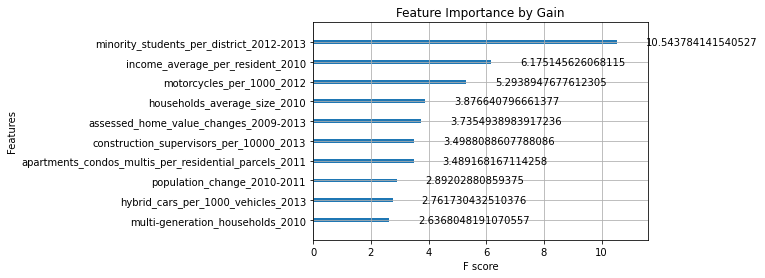

In [28]:
xgb.plot_importance(xgb_binary_clf, max_num_features=10, importance_type='gain', title='Feature Importance by Gain') 